In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt








pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)



In [38]:
df = pd.read_csv('matches.csv', index_col=0)



df = df.drop(['comp','match report', 'notes'], axis=1)

df = df[df['result'] != 'D']

df['result_num'] = df['result'].map({'W': 1, 'L': 0})

df.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team,result_num
1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,58262.0,Fernandinho,4-3-3,Anthony Taylor,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,1
8,2021-09-25,12:30,Matchweek 6,Sat,Away,W,1.0,0.0,Chelsea,1.7,0.3,60.0,40036.0,Rúben Dias,4-3-3,Michael Oliver,15.0,3.0,16.5,0.0,0.0,0.0,2022,Manchester City,1


In [39]:
df['date'] = pd.to_datetime(df['date'])

df['venue'] = df['venue'].apply(lambda x: 1 if x == 'Home' else 0)

df = df.drop('result', axis=1)






In [40]:
num_cols = ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'venue', 'result_num']

cat_cols = ['time', 'round', 'day','opponent', 'captain', 'referee', 'team']



In [41]:
for i in cat_cols:
    print(df[i].value_counts())

time
15:00    217
20:00    163
14:00    115
12:30     90
17:30     87
16:30     72
20:15     66
18:00     66
12:00     42
19:15     36
19:45     32
19:30     28
16:00     22
19:00     18
14:15     10
14:05      8
17:45      2
Name: count, dtype: int64
round
Matchweek 1     39
Matchweek 4     35
Matchweek 28    35
Matchweek 10    34
Matchweek 2     33
Matchweek 30    33
Matchweek 19    33
Matchweek 21    32
Matchweek 8     31
Matchweek 31    31
Matchweek 29    31
Matchweek 22    31
Matchweek 26    31
Matchweek 18    30
Matchweek 7     30
Matchweek 32    30
Matchweek 17    29
Matchweek 25    29
Matchweek 20    29
Matchweek 9     29
Matchweek 11    29
Matchweek 12    29
Matchweek 14    27
Matchweek 27    27
Matchweek 34    27
Matchweek 16    27
Matchweek 24    27
Matchweek 3     26
Matchweek 23    25
Matchweek 15    25
Matchweek 6     24
Matchweek 33    24
Matchweek 13    23
Matchweek 5     23
Matchweek 35    20
Matchweek 38    20
Matchweek 36    18
Matchweek 37    18
Name: count, dtype: 

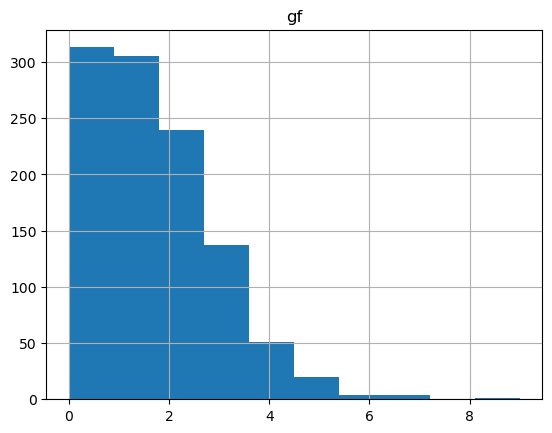

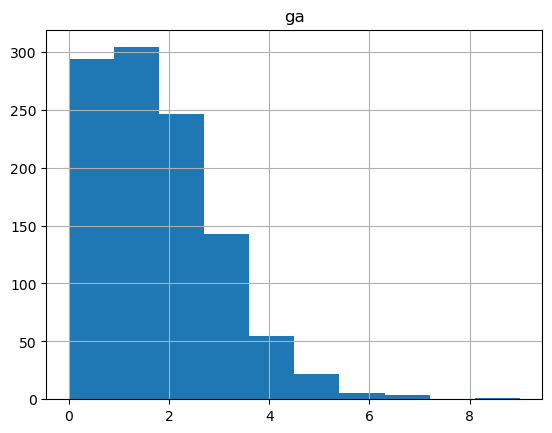

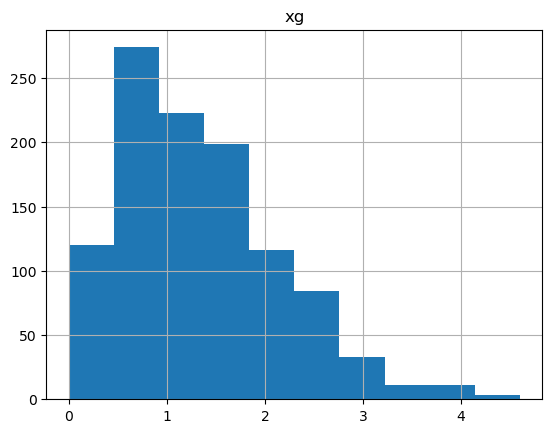

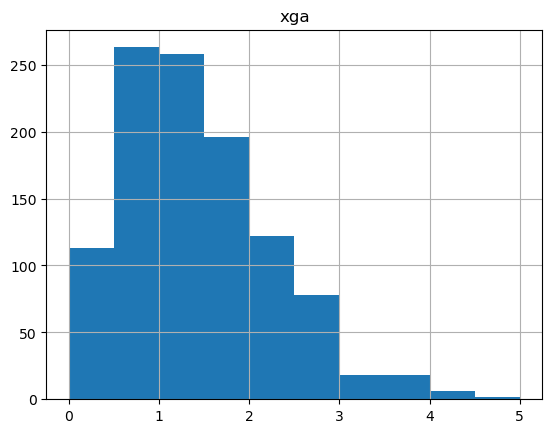

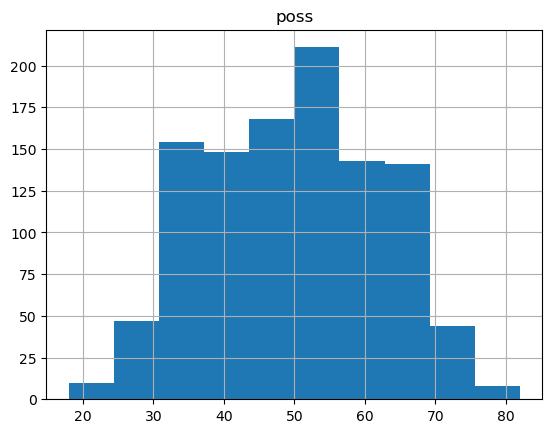

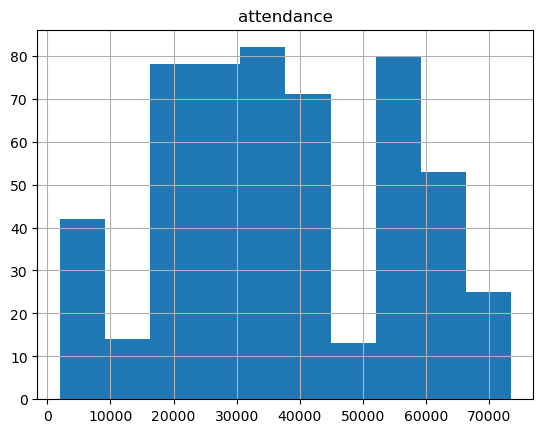

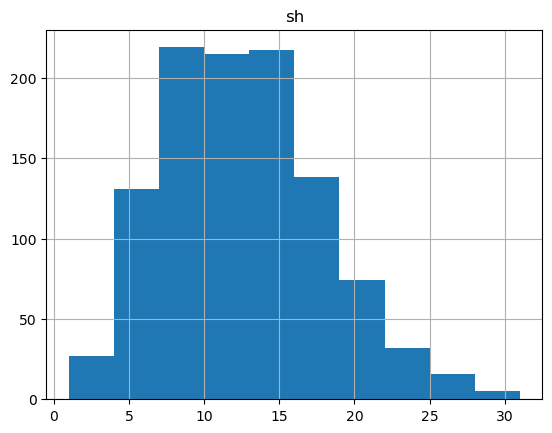

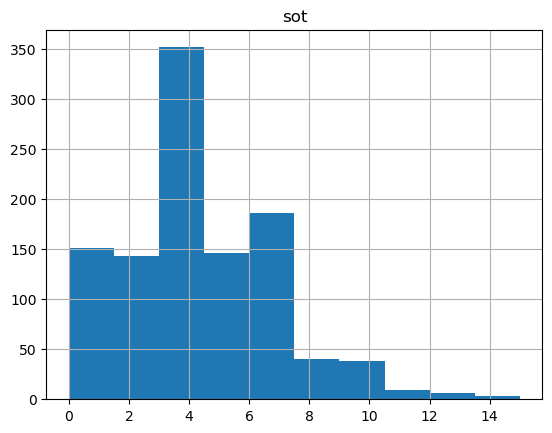

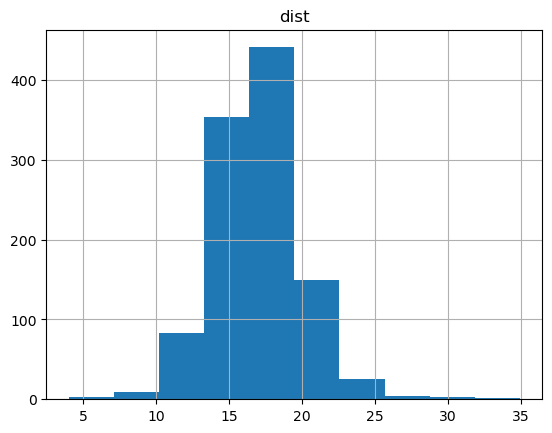

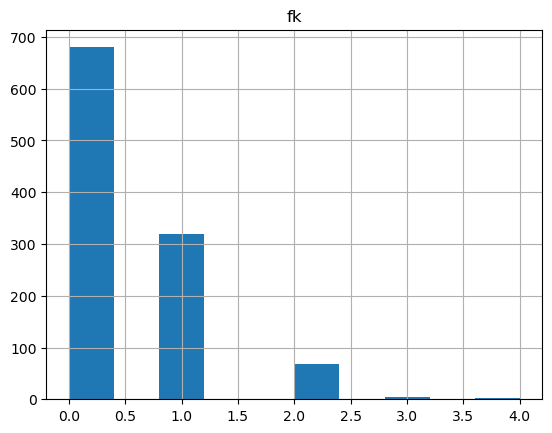

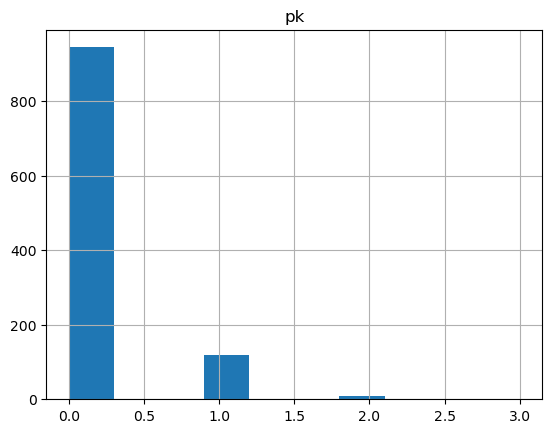

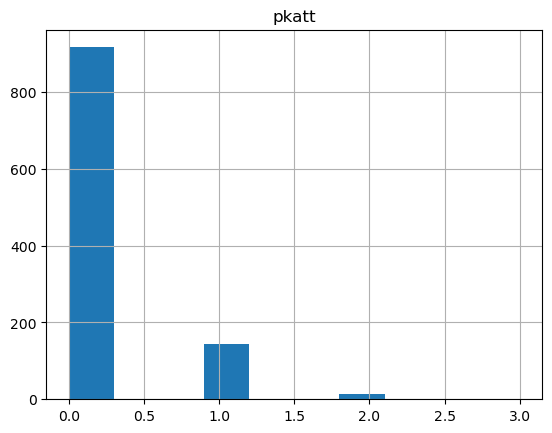

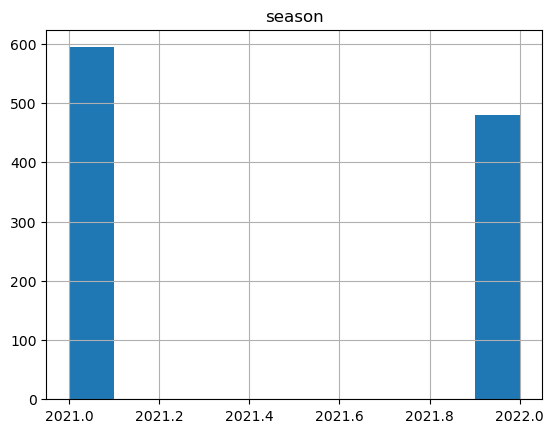

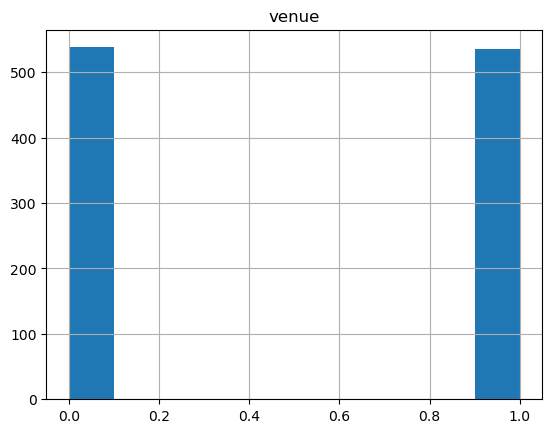

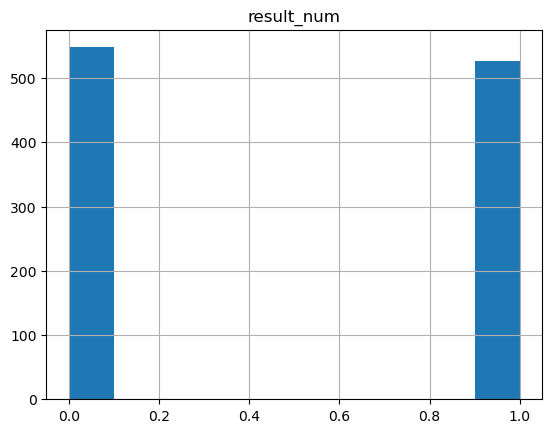

In [42]:
for i in num_cols:
    df[i].hist()
    plt.title(i)
    plt.show()

In [43]:
df.describe()

,date,venue,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,result_num
count,1074,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,536.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,2021-06-22 15:09:03.016759552,0.499069,1.451583,1.510242,1.334171,1.379050,49.647114,36376.598881,12.118250,4.121043,16.995810,0.445065,0.132216,0.161080,2021.446927,0.489758
min,2020-09-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000,0.000000
25%,2021-01-17 00:00:00,0.000000,0.000000,0.000000,0.700000,0.700000,40.000000,23361.750000,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000,0.000000
50%,2021-05-11 00:00:00,0.000000,1.000000,1.000000,1.200000,1.200000,50.000000,32236.000000,12.000000,4.000000,16.950000,0.000000,0.000000,0.000000,2021.000000,0.000000
75%,2021-12-11 00:00:00,1.000000,2.000000,2.000000,1.800000,1.900000,59.000000,52576.000000,15.000000,6.000000,18.700000,1.000000,0.000000,0.000000,2022.000000,1.000000
max,2022-04-24 00:00:00,1.000000,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000,1.000000
std,NaN,0.500232,1.354287,1.369481,0.798295,0.824971,12.404989,18222.695986,5.283217,2.464334,3.020062,0.651372,0.372925,0.406303,0.497407,0.500128


In [44]:
df[num_cols].skew()

gf            1.048764
ga            1.005861
xg            0.837603
xga           0.867726
poss          0.014631
attendance    0.084423
sh            0.480839
sot           0.770002
dist          0.510366
fk            1.430642
pk            2.958397
pkatt         2.574114
season        0.213795
venue         0.003730
result_num    0.041034
dtype: float64

In [45]:
#pk, pkatt, fk

df['pk'] = np.log1p(df['pk'])
df['pkatt'] = np.log1p(df['pkatt'])
df['fk'] = np.log1p(df['fk'])


In [46]:
df.groupby('result_num')[num_cols].mean()


,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,venue,result_num
result_num,,,,,,,,,,,,,,,
0,0.541971,2.421533,0.948358,1.779380,47.868613,36769.749104,10.605839,3.003650,17.302737,0.271473,0.038161,0.059879,2021.458029,0.481752,0.0
1,2.399240,0.560837,1.736122,0.961977,51.500000,35949.793774,13.693916,5.285171,16.676046,0.298865,0.140579,0.157163,2021.435361,0.517110,1.0


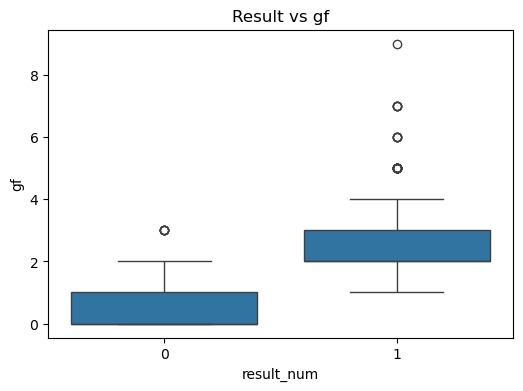

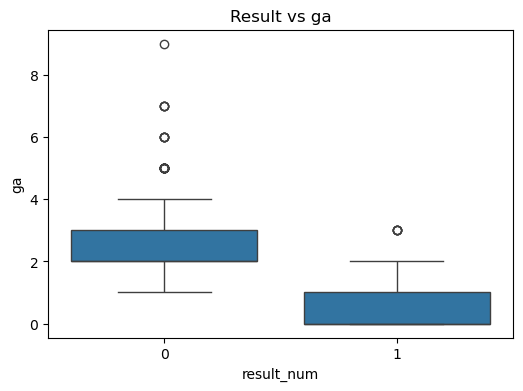

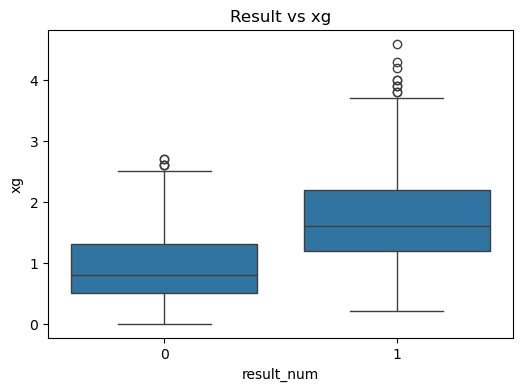

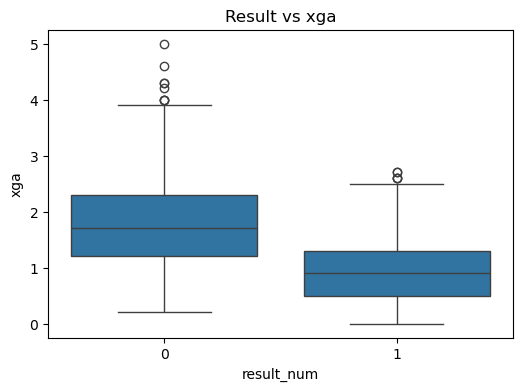

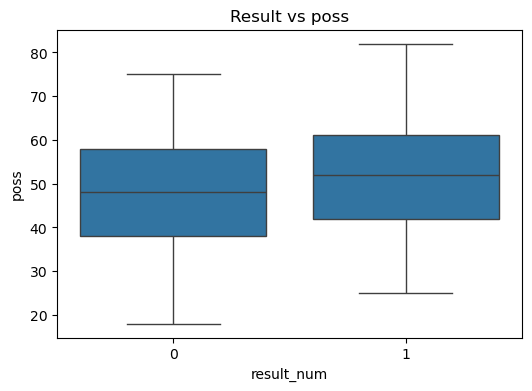

ValueError: cannot reindex on an axis with duplicate labels

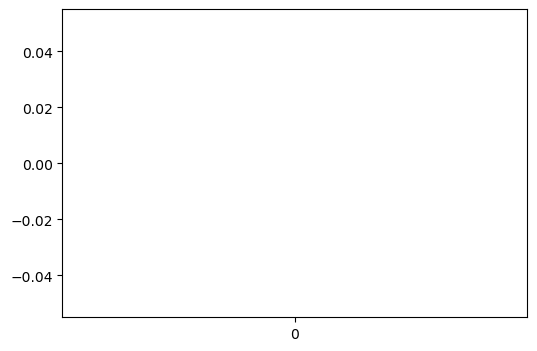

In [47]:
#sot, xg + sot, 


for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='result_num', y=col, data=df)
    plt.title(f"Result vs {col}")
    plt.show()

In [48]:
df.head()

,date,time,round,day,venue,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team,result_num
1,2021-08-15,16:30,Matchweek 1,Sun,0,0.0,1.0,Tottenham,1.9,1.3,64.0,58262.0,Fernandinho,4-3-3,Anthony Taylor,18.0,4.0,16.9,0.693147,0.0,0.0,2022,Manchester City,0
2,2021-08-21,15:00,Matchweek 2,Sat,1,5.0,0.0,Norwich City,2.7,0.1,67.0,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,16.0,4.0,17.3,0.693147,0.0,0.0,2022,Manchester City,1
3,2021-08-28,12:30,Matchweek 3,Sat,1,5.0,0.0,Arsenal,3.8,0.1,80.0,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,25.0,10.0,14.3,0.000000,0.0,0.0,2022,Manchester City,1
4,2021-09-11,15:00,Matchweek 4,Sat,0,1.0,0.0,Leicester City,2.9,0.8,61.0,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,25.0,8.0,14.0,0.000000,0.0,0.0,2022,Manchester City,1
8,2021-09-25,12:30,Matchweek 6,Sat,0,1.0,0.0,Chelsea,1.7,0.3,60.0,40036.0,Rúben Dias,4-3-3,Michael Oliver,15.0,3.0,16.5,0.000000,0.0,0.0,2022,Manchester City,1


In [49]:
df['time'] = df['time'].str.replace(':', '').astype(int)

In [50]:
# One-hot encode categorical features
categorical_features = ['day', 'opponent', 'captain', 'referee', 'team']

df = pd.get_dummies(df, columns=categorical_features, prefix=['day', 'opp', 'captain', 'referee', 'team'])

# Convert 'round' to numeric
df['week'] = df['round'].str.extract('(\d+)').astype(int)

# Optionally drop the original 'round' column
df = df.drop('round', axis=1)




In [51]:
df.head()

,date,time,venue,gf,ga,xg,xga,poss,attendance,formation,sh,sot,dist,fk,pk,pkatt,season,result_num,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,opp_Arsenal,opp_Aston Villa,opp_Brentford,opp_Brighton,opp_Burnley,opp_Chelsea,opp_Crystal Palace,opp_Everton,opp_Fulham,opp_Leeds United,opp_Leicester City,opp_Liverpool,opp_Manchester City,opp_Manchester Utd,opp_Newcastle Utd,opp_Norwich City,opp_Sheffield Utd,opp_Southampton,opp_Tottenham,opp_Watford,opp_West Brom,opp_West Ham,opp_Wolves,captain_Aaron Cresswell,captain_Adam Lallana,captain_Adam Webster,captain_Aleksandar Mitrović,captain_Alexandre Lacazette,captain_Ashley Westwood,captain_Ben Foster,captain_Ben Gibson,captain_Ben Mee,captain_Billy Sharp,captain_Branislav Ivanović,captain_Bruno Fernandes,captain_Christian Nørgaard,captain_Conor Coady,captain_Craig Cathcart,captain_Cristiano Ronaldo,captain_César Azpilicueta,captain_Dan Burn,captain_David McGoldrick,captain_Declan Rice,captain_Fabian Schär,captain_Federico Fernández,captain_Fernandinho,captain_Gary Cahill,captain_Georginio Wijnaldum,captain_Granit Xhaka,captain_Grant Hanley,captain_Gylfi Sigurðsson,captain_Harry Kane,captain_Harry Maguire,captain_Hugo Lloris,captain_Héctor Bellerín,captain_Jack Grealish,captain_Jake Livermore,captain_Jamaal Lascelles,captain_James McArthur,captain_James Milner,captain_James Tarkowski,captain_James Ward-Prowse,captain_Joachim Andersen,captain_Joel Ward,captain_John Egan,captain_John McGinn,captain_Jonjo Shelvey,captain_Jordan Henderson,captain_Jordan Pickford,captain_Jorginho,captain_Kasper Schmeichel,captain_Kevin De Bruyne,captain_Kieran Trippier,captain_Kyle Bartley,captain_Lewis Dunk,captain_Liam Cooper,captain_Lucas Digne,captain_Luka Milivojević,captain_Luke Ayling,captain_Marc Guéhi,captain_Marcos Alonso,captain_Mark Noble,captain_Martin Ødegaard,captain_Mason Holgate,captain_Matt Phillips,captain_Michael Keane,captain_Moussa Sissoko,captain_N'Golo Kanté,captain_Nemanja Matić,captain_Oriol Romeu,captain_Pascal Groß,captain_Pierre-Emerick Aubameyang,captain_Pontus Jansson,captain_Raheem Sterling,captain_Rob Holding,captain_Roberto Firmino,captain_Rúben Dias,captain_Scott Dann,captain_Sergio Agüero,captain_Séamus Coleman,captain_Thiago Silva,captain_Tim Ream,captain_Tom Cairney,captain_Tom Cleverley,captain_Tyrone Mings,captain_Virgil van Dijk,captain_Wilfried Zaha,captain_William Troost-Ekong,captain_Yerry Mina,captain_İlkay Gündoğan,referee_Andre Marriner,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_Darren England,referee_David Coote,referee_Graham Scott,referee_Jarred Gillett,referee_John Brooks,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Martin Atkinson,referee_Michael Oliver,referee_Michael Salisbury,referee_Mike Dean,referee_Paul Tierney,referee_Peter Bankes,referee_Robert Jones,referee_Simon Hooper,referee_Stuart Attwell,referee_Tony Harrington,team_Arsenal,team_Aston Villa,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers,week
1,2021-08-15,1630,0,0.0,1.0,1.9,1.3,64.0,58262.0,4-3-3,18.0,4.0,16.9,0.693147,0.0,0.0,2022,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

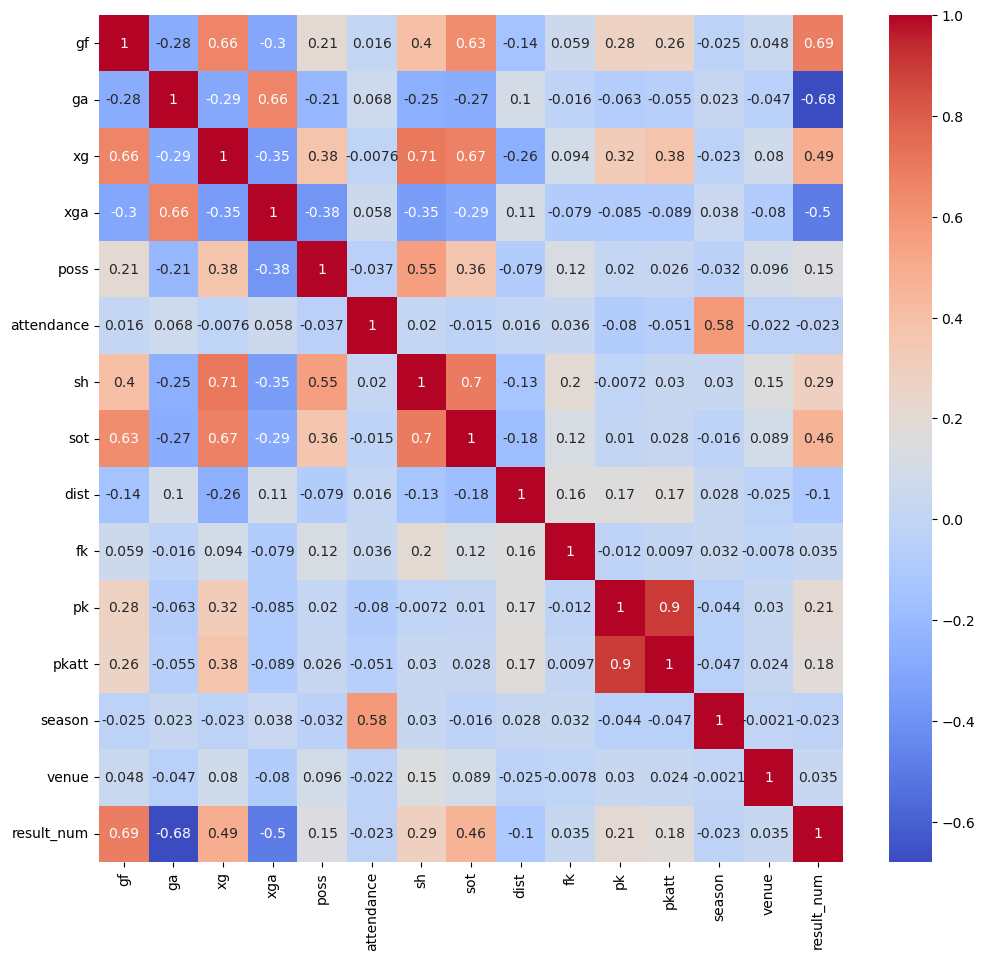

In [52]:
numerical = df[num_cols]

plt.figure(figsize=(12,11))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

In [53]:
df.head()

,date,time,venue,gf,ga,xg,xga,poss,attendance,formation,sh,sot,dist,fk,pk,pkatt,season,result_num,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,opp_Arsenal,opp_Aston Villa,opp_Brentford,opp_Brighton,opp_Burnley,opp_Chelsea,opp_Crystal Palace,opp_Everton,opp_Fulham,opp_Leeds United,opp_Leicester City,opp_Liverpool,opp_Manchester City,opp_Manchester Utd,opp_Newcastle Utd,opp_Norwich City,opp_Sheffield Utd,opp_Southampton,opp_Tottenham,opp_Watford,opp_West Brom,opp_West Ham,opp_Wolves,captain_Aaron Cresswell,captain_Adam Lallana,captain_Adam Webster,captain_Aleksandar Mitrović,captain_Alexandre Lacazette,captain_Ashley Westwood,captain_Ben Foster,captain_Ben Gibson,captain_Ben Mee,captain_Billy Sharp,captain_Branislav Ivanović,captain_Bruno Fernandes,captain_Christian Nørgaard,captain_Conor Coady,captain_Craig Cathcart,captain_Cristiano Ronaldo,captain_César Azpilicueta,captain_Dan Burn,captain_David McGoldrick,captain_Declan Rice,captain_Fabian Schär,captain_Federico Fernández,captain_Fernandinho,captain_Gary Cahill,captain_Georginio Wijnaldum,captain_Granit Xhaka,captain_Grant Hanley,captain_Gylfi Sigurðsson,captain_Harry Kane,captain_Harry Maguire,captain_Hugo Lloris,captain_Héctor Bellerín,captain_Jack Grealish,captain_Jake Livermore,captain_Jamaal Lascelles,captain_James McArthur,captain_James Milner,captain_James Tarkowski,captain_James Ward-Prowse,captain_Joachim Andersen,captain_Joel Ward,captain_John Egan,captain_John McGinn,captain_Jonjo Shelvey,captain_Jordan Henderson,captain_Jordan Pickford,captain_Jorginho,captain_Kasper Schmeichel,captain_Kevin De Bruyne,captain_Kieran Trippier,captain_Kyle Bartley,captain_Lewis Dunk,captain_Liam Cooper,captain_Lucas Digne,captain_Luka Milivojević,captain_Luke Ayling,captain_Marc Guéhi,captain_Marcos Alonso,captain_Mark Noble,captain_Martin Ødegaard,captain_Mason Holgate,captain_Matt Phillips,captain_Michael Keane,captain_Moussa Sissoko,captain_N'Golo Kanté,captain_Nemanja Matić,captain_Oriol Romeu,captain_Pascal Groß,captain_Pierre-Emerick Aubameyang,captain_Pontus Jansson,captain_Raheem Sterling,captain_Rob Holding,captain_Roberto Firmino,captain_Rúben Dias,captain_Scott Dann,captain_Sergio Agüero,captain_Séamus Coleman,captain_Thiago Silva,captain_Tim Ream,captain_Tom Cairney,captain_Tom Cleverley,captain_Tyrone Mings,captain_Virgil van Dijk,captain_Wilfried Zaha,captain_William Troost-Ekong,captain_Yerry Mina,captain_İlkay Gündoğan,referee_Andre Marriner,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_Darren England,referee_David Coote,referee_Graham Scott,referee_Jarred Gillett,referee_John Brooks,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Martin Atkinson,referee_Michael Oliver,referee_Michael Salisbury,referee_Mike Dean,referee_Paul Tierney,referee_Peter Bankes,referee_Robert Jones,referee_Simon Hooper,referee_Stuart Attwell,referee_Tony Harrington,team_Arsenal,team_Aston Villa,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers,week
1,2021-08-15,1630,0,0.0,1.0,1.9,1.3,64.0,58262.0,4-3-3,18.0,4.0,16.9,0.693147,0.0,0.0,2022,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [68]:
df['shotsperpossesion'] = df['poss'] / df['sh']
df['conversionrate'] = df.apply(lambda row: row['gf'] / row['sh'] if row['sh'] > 0 else 0, axis=1)
df['Goaladvantage'] = df.apply(lambda row: row['gf'] / row['xg'] if row['xg'] > 0 else 0, axis=1)







df = df.drop('formation', axis=1)

KeyError: "['formation'] not found in axis"

In [69]:
df['attendance'] = df['attendance'].fillna(df['attendance'].median())

In [70]:
df.isnull().sum()

date                                 0
time                                 0
venue                                0
gf                                   0
ga                                   0
xg                                   0
xga                                  0
poss                                 0
attendance                           0
sh                                   0
sot                                  0
dist                                 0
fk                                   0
pk                                   0
pkatt                                0
season                               0
result_num                           0
day_Fri                              0
day_Mon                              0
day_Sat                              0
day_Sun                              0
day_Thu                              0
day_Tue                              0
day_Wed                              0
opp_Arsenal                          0
opp_Aston Villa          

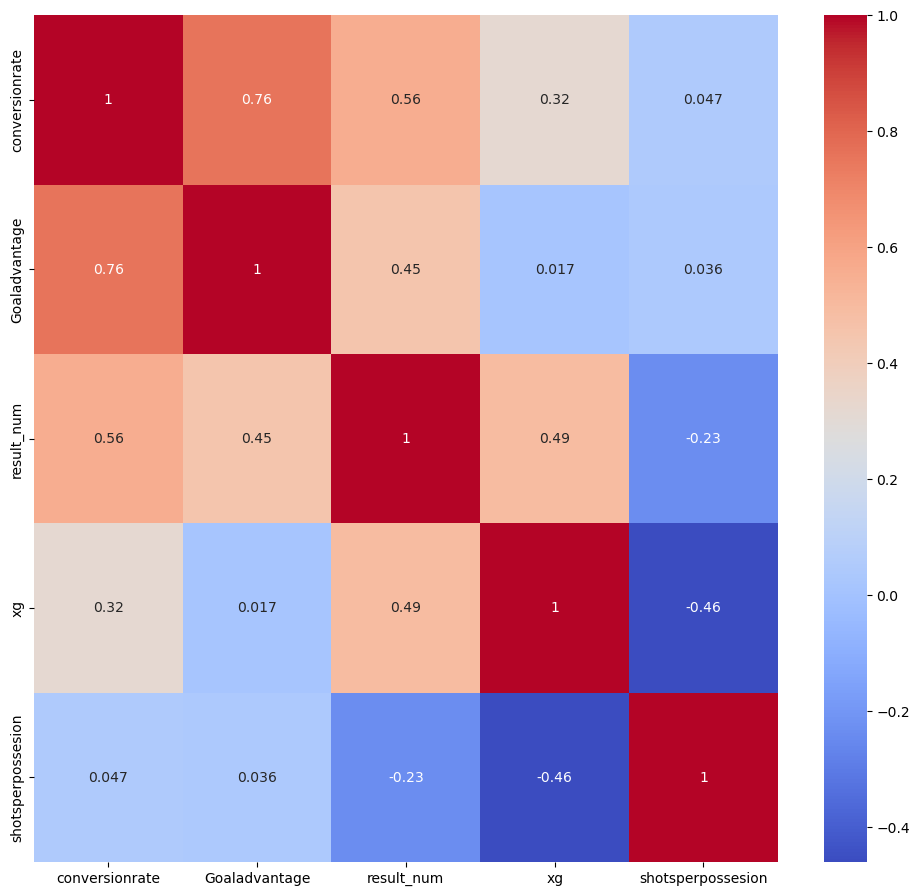

In [71]:
nu = [ 'conversionrate', 'Goaladvantage', 'result_num', 'xg', 'shotsperpossesion']

jak = df[nu]



plt.figure(figsize=(12,11))
sns.heatmap(jak.corr(), annot=True, cmap='coolwarm')
plt.show()

In [84]:
df = df.drop('date', axis=1)

In [85]:
from sklearn.model_selection import train_test_split, cross_val_score



X = df.drop('result_num', axis=1)

y = df['result_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)







In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth = 10,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    random_state=42,
    n_jobs = -1
)

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print('5 fold accuracy', cv_scores)
print('average accuracy', np.mean(cv_scores))

rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print('accuracy', accuracy_score(y_test, y_pred))
print('confusion matrix', confusion_matrix(y_test, y_pred))
print('classification report', classification_report(y_test, y_pred))



5 fold accuracy [0.99418605 0.98837209 0.99418605 0.99418605 0.99415205]
average accuracy 0.9930164558683531
accuracy 1.0
confusion matrix [[110   0]
 [  0 105]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       105

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



NameError: name 'features' is not defined

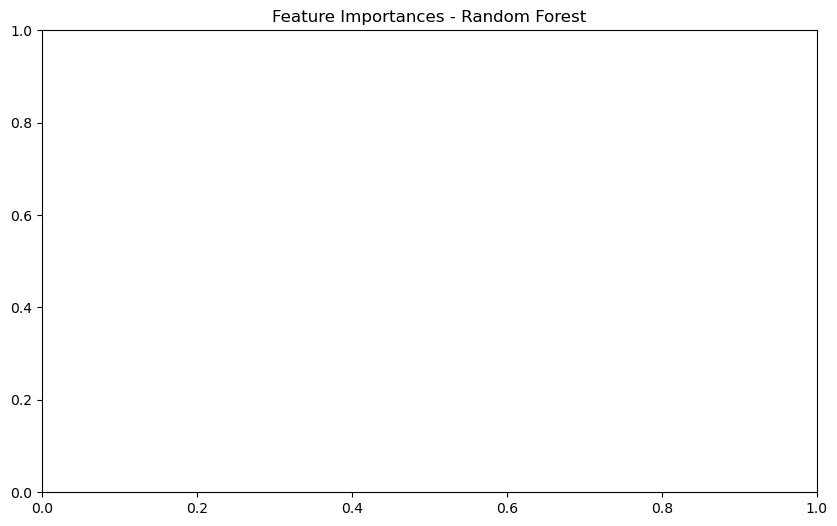